# Predicting Car Prices

In this guided project, I'll practice going through a machine learning workflow and predict car market price using its attributes through a knn clustering model. The data set we will be working with contains information on various cars. For each car we have information about the technical aspects of the vehicle such as the motor's displacement, the weight of the car, the miles per gallon, how fast the car accelerates, and more.

The models' accuracies will be evaluated by their RMSE.

In [1]:
import pandas as pd
import numpy as np
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
from pandas_profiling import ProfileReport
import matplotlib.pyplot as plt
%matplotlib inline

pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000000)

df = pd.read_csv('/Users/miesner.jacob/Desktop/DataQuest/datasets/car_data.csv')

In [2]:
df.columns

Index(['%symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration',
       'num-of-doors', 'body-style', 'drive-wheels', 'engine-location',
       'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type',
       'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke',
       'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg',
       'highway-mpg', 'price'],
      dtype='object')

In [3]:
df.head()

,%symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450


In [4]:
df.describe()

,%symboling,wheel-base,length,width,height,curb-weight,engine-size,compression-ratio,city-mpg,highway-mpg
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,10.142537,25.219512,30.751220
std,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,3.972040,6.542142,6.886443
min,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,7.000000,13.000000,16.000000
25%,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,8.600000,19.000000,25.000000
50%,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,9.000000,24.000000,30.000000
75%,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,9.400000,30.000000,34.000000
max,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,23.000000,49.000000,54.000000


In [5]:
df = df.replace('?',np.nan)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
%symboling           205 non-null int64
normalized-losses    164 non-null object
make                 205 non-null object
fuel-type            205 non-null object
aspiration           205 non-null object
num-of-doors         203 non-null object
body-style           205 non-null object
drive-wheels         205 non-null object
engine-location      205 non-null object
wheel-base           205 non-null float64
length               205 non-null float64
width                205 non-null float64
height               205 non-null float64
curb-weight          205 non-null int64
engine-type          205 non-null object
num-of-cylinders     205 non-null object
engine-size          205 non-null int64
fuel-system          205 non-null object
bore                 201 non-null object
stroke               201 non-null object
compression-ratio    205 non-null float64
horsepower           203 non-nul

In [7]:
#profile = ProfileReport(df, title='Pandas Profiling Report')
#profile

In [8]:
dict = {'two':2,'three':3,'four':4,'five':5,'six':6,'eight':8,'twelve':12}
df['num-of-cylinders'] = df['num-of-cylinders'].map(dict)  

dict = {'two':2,'four':4}
df['num-of-doors'] = df['num-of-doors'].map(dict) 

In [9]:
df.isnull().sum()

%symboling            0
normalized-losses    41
make                  0
fuel-type             0
aspiration            0
num-of-doors          2
body-style            0
drive-wheels          0
engine-location       0
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
engine-type           0
num-of-cylinders      0
engine-size           0
fuel-system           0
bore                  4
stroke                4
compression-ratio     0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 4
dtype: int64

In [10]:
df = df.drop('normalized-losses',axis = 1)

In [11]:
df = df.dropna(how='any')

In [12]:
df.columns

Index(['%symboling', 'make', 'fuel-type', 'aspiration', 'num-of-doors',
       'body-style', 'drive-wheels', 'engine-location', 'wheel-base', 'length',
       'width', 'height', 'curb-weight', 'engine-type', 'num-of-cylinders',
       'engine-size', 'fuel-system', 'bore', 'stroke', 'compression-ratio',
       'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg', 'price'],
      dtype='object')

In [13]:
cols_to_norm = ['%symboling',
                'wheel-base', 
                'length', 
                'width', 
                'height', 
                'curb-weight', 
                'bore', 
                'stroke', 
                'compression-ratio', 
                'horsepower', 
                'peak-rpm', 
                'city-mpg', 
                'highway-mpg']

df['price'] = df['price'].astype(float)
df[cols_to_norm] = df[cols_to_norm].astype(float)

In [14]:
df.dtypes

%symboling           float64
make                  object
fuel-type             object
aspiration            object
num-of-doors         float64
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight          float64
engine-type           object
num-of-cylinders       int64
engine-size            int64
fuel-system           object
bore                 float64
stroke               float64
compression-ratio    float64
horsepower           float64
peak-rpm             float64
city-mpg             float64
highway-mpg          float64
price                float64
dtype: object

In [15]:
df[cols_to_norm] = df[cols_to_norm].apply(lambda x: (x - x.min()) / (x.max() - x.min()))
numeric_cols = df[cols_to_norm].copy()
numeric_cols = pd.concat([numeric_cols,df['price']],axis = 1)

In [16]:
def knn_train_test(df, attribute, target):
    np.random.seed(1)
        
    # Randomize
    shuffled_index = np.random.permutation(df.index)
    rand_df = df.reindex(shuffled_index)

    # Train/Test Split
    last_train_row = int(len(rand_df) / 2)
    train_df = rand_df.iloc[0:last_train_row]
    test_df = rand_df.iloc[last_train_row:]
    
    # Fit a KNN model using default k value.
    k_values = [1,3,5,7,9,11,15,20]
    k_rmses = {}
    
    for k in k_values:
        knn = KNeighborsRegressor(n_neighbors=k)
        knn.fit(train_df[[attribute]], train_df[target])
    
        # Make predictions
        predicted_labels = knn.predict(test_df[[attribute]])

        # Calculate and return RMSE.
        mse = mean_squared_error(test_df[target], predicted_labels)
        rmse = np.sqrt(mse)
        k_rmses[k] = rmse
    return k_rmses

rmse_results = {}
train_cols = numeric_cols.columns.drop('price')

for col in train_cols:
    rmse_val = knn_train_test(numeric_cols, col, 'price')
    rmse_results[col] = rmse_val

for key, value in rmse_results.items():
    print(key)
    print(min(value.items(), key=lambda x: x[1]) )

%symboling
(20, 8256.819980818544)
wheel-base
(3, 5691.155680372482)
length
(3, 5764.587398219127)
width
(3, 4360.62964966996)
height
(7, 8137.528220733606)
curb-weight
(3, 4142.948725351724)
bore
(9, 7165.445393921243)
stroke
(3, 7567.623206793531)
compression-ratio
(7, 6533.591537872384)
horsepower
(3, 4481.678972224604)
peak-rpm
(3, 7422.196486012476)
city-mpg
(3, 4295.1437456859785)
highway-mpg
(3, 4256.584038115483)


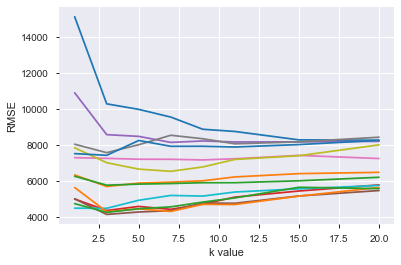

In [17]:
for key, value in rmse_results.items():
    x = list(value.keys())
    y = list(value.values())
    
    plt.plot(x,y)
    plt.xlabel('k value')
    plt.ylabel('RMSE')

The chart above shows that the univariate models saw there best results at a k value of approximately 8 and saw decreasing accuracy after raising the k values any further. The highway-mpg attribute had the lowest RMSE out of all the univariate models.

# Multivariate Model

In [19]:
feature_avg_rmse = {}
for k,v in rmse_results.items():
    avg_rmse = np.mean(list(v.values()))
    feature_avg_rmse[k] = avg_rmse
series_avg_rmse = pd.Series(feature_avg_rmse)
series_avg_rmse.sort_values()

curb-weight          4743.539059
city-mpg             4859.716524
highway-mpg          4890.366612
width                4926.317286
horsepower           5119.116755
length               5964.569710
wheel-base           6118.519213
compression-ratio    7175.851787
bore                 7250.270030
peak-rpm             7897.078816
stroke               8142.298643
height               8600.739308
%symboling           9879.860750
dtype: float64

In [22]:
def knn_train_test(train_cols, target_col, df):
    np.random.seed(1)
    
    shuffled_index = np.random.permutation(df.index)
    rand_df = df.reindex(shuffled_index)

    last_train_row = int(len(rand_df) / 2)
    
    train_df = rand_df.iloc[0:last_train_row]
    test_df = rand_df.iloc[last_train_row:]
    
    k_values = [i for i in range(1, 25)]
    k_rmses = {}
    
    for k in k_values:
        knn = KNeighborsRegressor(n_neighbors=k)
        knn.fit(train_df[train_cols], train_df[target_col])
        predicted_labels = knn.predict(test_df[train_cols])
        mse = mean_squared_error(test_df[target_col], predicted_labels)
        rmse = np.sqrt(mse)
        
        k_rmses[k] = rmse
    return k_rmses

k_rmse_results = {}

two_best_features = ['curb-weight', 'city-mpg']
rmse_val = knn_train_test(two_best_features, 'price', numeric_cols)
k_rmse_results["two best features"] = rmse_val

three_best_features = ['curb-weight', 'city-mpg', 'highway-mpg']
rmse_val = knn_train_test(three_best_features, 'price', numeric_cols)
k_rmse_results["three best features"] = rmse_val

four_best_features = ['curb-weight', 'city-mpg', 'highway-mpg', 'width']
rmse_val = knn_train_test(four_best_features, 'price', numeric_cols)
k_rmse_results["four best features"] = rmse_val

five_best_features = ['curb-weight', 'city-mpg', 'highway-mpg', 'width' , 'horsepower']
rmse_val = knn_train_test(five_best_features, 'price', numeric_cols)
k_rmse_results["five best features"] = rmse_val

six_best_features = ['curb-weight', 'city-mpg', 'highway-mpg', 'width' , 'horsepower', 'length']
rmse_val = knn_train_test(six_best_features, 'price', numeric_cols)
k_rmse_results["six best features"] = rmse_val

all_features = ['%symboling',
                'wheel-base', 
                'length', 
                'width', 
                'height', 
                'curb-weight', 
                'bore', 
                'stroke', 
                'compression-ratio', 
                'horsepower', 
                'peak-rpm', 
                'city-mpg', 
                'highway-mpg']
                
rmse_val = knn_train_test(all_features, 'price', numeric_cols)
k_rmse_results["all_features"] = rmse_val

for key, value in k_rmse_results.items():
    print(key)
    print(min(value.items(), key=lambda x: x[1]) )

two best features
(3, 3176.3239827712887)
three best features
(3, 3274.2981913759945)
four best features
(1, 3092.120128099479)
five best features
(1, 2766.0818002678798)
six best features
(1, 2509.0925311548212)
all_features
(2, 3426.745335268366)


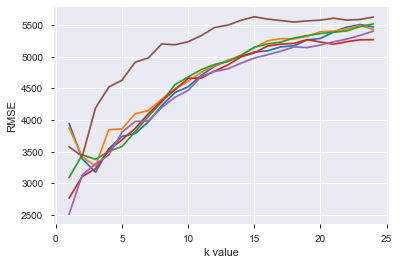

In [23]:
for k,v in k_rmse_results.items():
    x = list(v.keys())
    y = list(v.values())
    
    plt.plot(x,y)
    plt.xlabel('k value')
    plt.ylabel('RMSE')

The mutlivariate regression models saw the best results with the lower k values. The model using the top fix features from the univariate models had the best performance. This shows the value in feature selection.